In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [2]:
heart_dt = pd.read_csv('data.csv')

In [3]:
heart_dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [4]:
heart_dt.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2


In [5]:
#scaling the data 
heart_dt['target'].replace({1:0, 2:1}, inplace=True)

In [6]:
heart_dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [7]:
heart_dt.shape

(270, 14)

In [8]:
heart_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [9]:
#statistical measures 
heart_dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [10]:
heart_dt['target'].value_counts(sort=1)

0    150
1    120
Name: target, dtype: int64

In [11]:
X = heart_dt.drop(columns='target', axis= 1)
Y = heart_dt['target']

In [12]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     70    1   4       130   322    0        2      109      0      2.4   
1     67    0   3       115   564    0        2      160      0      1.6   
2     57    1   2       124   261    0        0      141      0      0.3   
3     64    1   4       128   263    0        0      105      1      0.2   
4     74    0   2       120   269    0        2      121      1      0.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
265   52    1   3       172   199    1        0      162      0      0.5   
266   44    1   2       120   263    0        0      173      0      0.0   
267   56    0   2       140   294    0        2      153      0      1.3   
268   57    1   4       140   192    0        0      148      0      0.4   
269   67    1   4       160   286    0        2      108      1      1.5   

     slope  ca  thal  
0        2   3     3  
1        2   0     7  
2        1   0    

In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: target, Length: 270, dtype: int64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify= Y, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(270, 13) (189, 13) (81, 13)


In [16]:
#model training
model = LogisticRegression()

In [17]:
model.fit(X_train, Y_train)

C:\Users\ZARAK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#accuracy on training data 
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [19]:
A = print('Accuracy is : ', training_data_accuracy )

Accuracy is :  0.8677248677248677


In [20]:
#accuracy on test data sp;it
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [21]:
B = print('accuracy on test data is : ', test_data_accuracy)

accuracy on test data is :  0.8518518518518519


In [22]:
#predictive system for new data to check whether someone has heart disease


input_data = (54,1,4,110,206,0,2,108,1,0,2,1,3) #input array


#now lets use the numpy library to create a numpy array to change the input data 

input_np_array = np.asarray(input_data)

#reshaping the data

input_data_reshaped = input_np_array.reshape(1,-1)

prediction =model.predict(input_data_reshaped)
print(prediction)

[1]


# visualizing the data

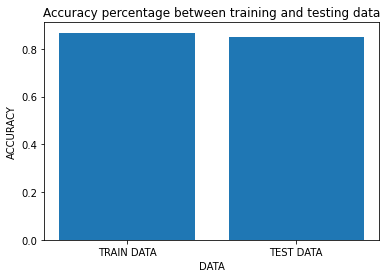

In [23]:
labels = ['TRAIN DATA','TEST DATA']
values = [training_data_accuracy, test_data_accuracy]
plt.bar(labels, values)
plt.title('Accuracy percentage between training and testing data')
plt.xlabel('DATA')
plt.ylabel('ACCURACY')
plt.show()

# DRAWING THE CONFUSION MATRIX 

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[40  5]
 [ 7 29]]


In [26]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

40 5 7 29


<AxesSubplot:>

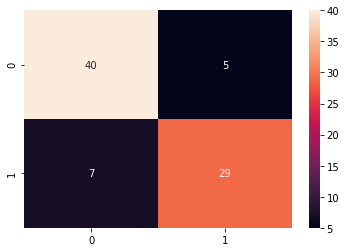

In [27]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# Generating classification reports

In [28]:
from sklearn.metrics import classification_report

In [29]:
classify = classification_report(Y_test, X_test_prediction)

print(classify)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        45
           1       0.85      0.81      0.83        36

    accuracy                           0.85        81
   macro avg       0.85      0.85      0.85        81
weighted avg       0.85      0.85      0.85        81

